In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_excel('flight_price.xlsx')
df.head() 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [28]:
##To check dimensions

df.shape

(10683, 11)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [30]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


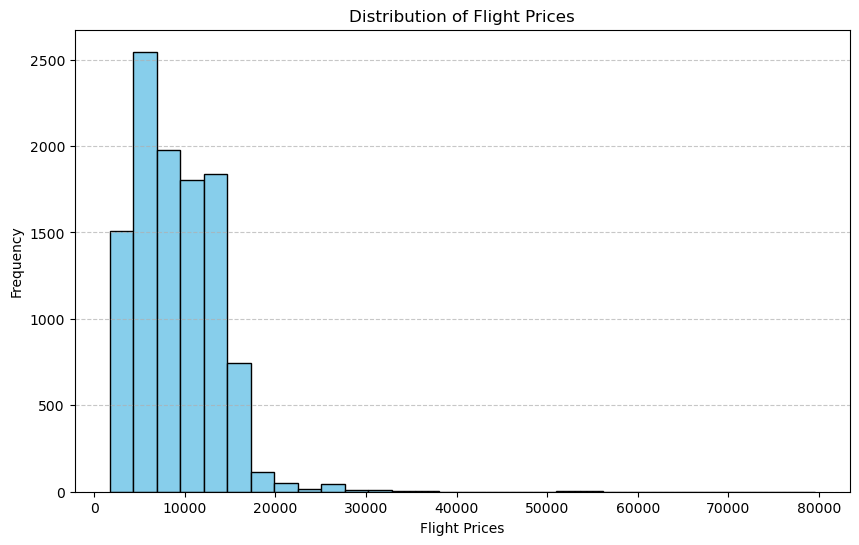

In [31]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Flight Prices')
plt.xlabel('Flight Prices')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [32]:
min_price = df['Price'].min()
max_price = df['Price'].max()

In [33]:
print(f"In This Dataset Maximum Number is {max_price}")
print(f"In This Dataset Minimum Number is {min_price}")

In This Dataset Maximum Number is 79512
In This Dataset Minimum Number is 1759


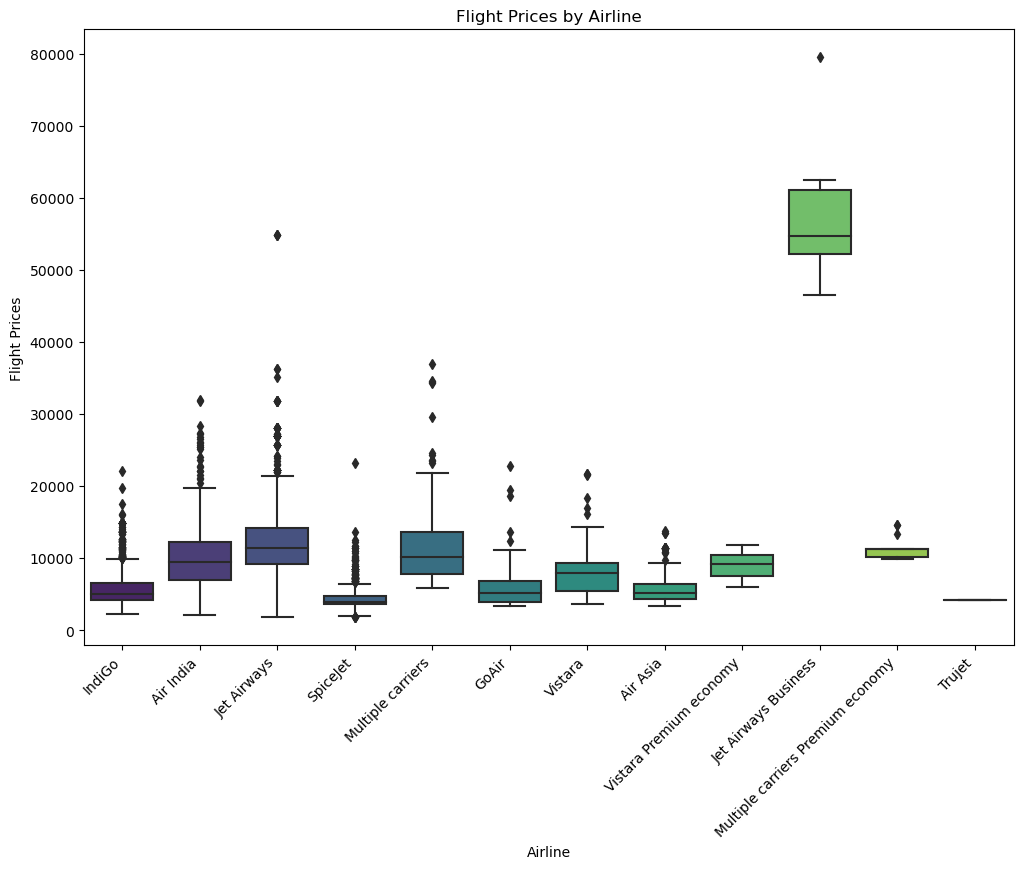

In [36]:
# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Airline', y='Price', data=df, palette='viridis')
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Flight Prices')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

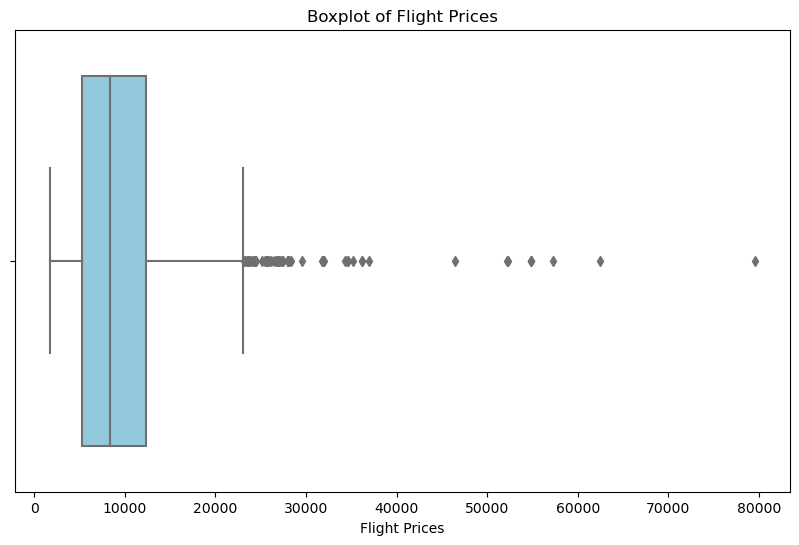

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'], color='skyblue')
plt.title('Boxplot of Flight Prices')
plt.xlabel('Flight Prices')
plt.show()

In [39]:
# Calculate the interquartile range (IQR)
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



In [40]:
# Identify potential outliers
potential_outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]

In [41]:
potential_outliers

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
123,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983
486,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890
510,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,12:25,5h 25m,1 stop,No info,26890
597,Air India,6/03/2019,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,09:40,15:15 07 Mar,29h 35m,2 stops,No info,25139
...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,6/03/2019,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,19:50,16:50 07 Mar,21h,2 stops,No info,24210
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
10383,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
10439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,09:00 02 Mar,14h 20m,1 stop,No info,31825


To identify the peak travel season in the Flight Price dataset, you can analyze several features that may exhibit patterns or variations corresponding to the seasonality of travel. Here are some features you might consider:

1. **Date or Month:**
   - Analyze the distribution of flights over different months or specific dates to identify any recurring patterns. Peak travel seasons often coincide with holidays, school breaks, or specific months with favorable weather conditions.

2. **Day of the Week:**
   - Explore the variation in flight prices based on the day of the week. Weekends and certain weekdays may experience higher demand, influencing peak travel seasons.

3. **Holiday Indicator:**
   - Include a binary indicator for holidays or special events that might impact travel. Increased demand during holidays or events could indicate a peak travel season.

4. **Flight Duration:**
   - Consider the average duration of flights. Longer flights may be more popular during vacation periods, contributing to peak travel seasons.

5. **Destination:**
   - Analyze the popularity of specific destinations during different times of the year. Certain locations may be more attractive during specific seasons, leading to increased demand.

6. **Airline:**
   - Investigate if certain airlines experience a surge in demand during particular seasons. Airlines may adjust their schedules or prices based on seasonal trends.

7. **Weather Conditions:**
   - Explore the impact of weather conditions on flight prices. For example, flights to tropical destinations might be more popular during the winter in colder regions.

8. **Advance Booking Trends:**
   - Analyze the relationship between the time of booking and flight prices. Peak travel seasons may be associated with a higher demand for last-minute bookings or, conversely, with travelers booking well in advance.

To present your findings to your boss, you can use various visualizations and insights gained from the analysis. Here's a suggested approach:

1. **Monthly or Seasonal Trends:**
   - Create line charts or bar plots to illustrate the variation in flight prices over different months or seasons. Highlight peaks and valleys to identify patterns.

2. **Day-of-Week Analysis:**
   - Show a bar chart or boxplot illustrating the distribution of flight prices based on the day of the week. Identify any days with consistently higher or lower prices.

3. **Holiday Impact:**
   - Display a timeline with indicators for holidays or special events and overlay it with flight price data. Showcase how prices fluctuate around these periods.

4. **Destination Popularity:**
   - Utilize a geographical map or bar chart to represent the popularity of different destinations during various times of the year.

5. **Airline Performance:**
   - Present a comparative analysis of different airlines, highlighting their performance during peak travel seasons.

6. **Weather Conditions and Flight Prices:**
   - Use scatter plots or line charts to demonstrate the correlation between weather conditions and flight prices. Highlight any significant relationships.

7. **Booking Trends:**
   - Create a line chart illustrating the average lead time for bookings and how it varies throughout the year. Identify trends in last-minute bookings or early reservations.

Remember to provide clear insights and actionable recommendations based on your analysis, helping your boss make informed decisions about pricing strategies, marketing efforts, and resource allocation during peak travel seasons.

To identify trends in flight prices in the Flight Price dataset, you can analyze several key features that may influence pricing dynamics. Here are some features to consider and potential visualizations to present your findings to your team:

1. **Time Trends:**
   - **Feature to Analyze:** Date or Timestamp of the flight.
   - **Visualization:** Time series line chart or a scatter plot with a time axis to visualize how flight prices change over time. You can use different lines or colors to represent different routes or airlines.

2. **Seasonal Trends:**
   - **Feature to Analyze:** Month or season.
   - **Visualization:** Boxplots or bar charts showing the median and distribution of flight prices for each month or season. This helps identify any recurring patterns or seasonality.

3. **Day-of-Week Trends:**
   - **Feature to Analyze:** Day of the week.
   - **Visualization:** Bar chart or boxplot showing the average flight prices for each day of the week. Identify if certain days consistently have higher or lower prices.

4. **Route or Destination Trends:**
   - **Feature to Analyze:** Destination or route.
   - **Visualization:** Grouped bar charts, heatmaps, or geographical maps to showcase the average prices for different destinations or routes. Identify popular and expensive routes.

5. **Flight Duration Trends:**
   - **Feature to Analyze:** Flight duration.
   - **Visualization:** Scatter plot or line chart showing the relationship between flight duration and price. This can help identify any correlation between longer flights and higher prices.

6. **Booking Class or Cabin Type Trends:**
   - **Feature to Analyze:** Booking class or cabin type.
   - **Visualization:** Grouped bar charts or boxplots comparing the average prices for different booking classes or cabin types. Identify trends in premium or economy pricing.

7. **Advance Booking Trends:**
   - **Feature to Analyze:** Time of booking in advance.
   - **Visualization:** Line chart or scatter plot showing how flight prices vary based on the time of booking. Identify trends in last-minute bookings or early reservations.

8. **Airline-Specific Trends:**
   - **Feature to Analyze:** Airline.
   - **Visualization:** Multiple line charts or boxplots, one for each airline, to compare how prices vary across different airlines. Identify any consistent patterns or differences.

9. **Promotion or Discount Trends:**
   - **Feature to Analyze:** Promotions, discounts, or special offers.
   - **Visualization:** Time series line chart overlaying promotions with flight prices. Identify if promotions impact price trends.

10. **Customer Segmentation Trends:**
    - **Feature to Analyze:** Customer segments (e.g., business travelers, leisure travelers).
    - **Visualization:** Grouped bar charts or boxplots comparing average prices for different customer segments. Identify trends in pricing strategies for specific customer groups.

When presenting your findings to your team, consider creating a comprehensive report or presentation that includes a mix of visualizations, insights, and actionable recommendations. Visualizations such as line charts, bar charts, boxplots, and scatter plots can effectively communicate trends and patterns in flight prices. Use clear labels, annotations, and color-coding to enhance the interpretability of your visualizations. Additionally, provide context and explanations for any observed trends to help your team make informed decisions.

As a data scientist working for an airline company, you would want to analyze various features that could potentially affect flight prices. Here are key features to consider, along with potential approaches and visualizations to present your findings to the management team:

1. **Route and Destination:**
   - **Feature to Analyze:** Departure and arrival locations.
   - **Approach:** Evaluate the average prices for different routes and destinations.
   - **Visualization:** Geographical maps, bar charts, or heatmaps displaying average prices for various routes.

2. **Time Factors:**
   - **Feature to Analyze:** Date, time, month, and season.
   - **Approach:** Examine how flight prices vary based on the time of day, day of the week, month, and season.
   - **Visualization:** Time series line charts, boxplots, or bar charts showing trends in prices over time.

3. **Flight Duration:**
   - **Feature to Analyze:** Flight duration.
   - **Approach:** Assess the relationship between flight duration and prices.
   - **Visualization:** Scatter plots or line charts demonstrating how prices correlate with different flight durations.

4. **Airline:**
   - **Feature to Analyze:** Airline.
   - **Approach:** Evaluate the impact of different airlines on flight prices.
   - **Visualization:** Boxplots or bar charts comparing the average prices of flights offered by different airlines.

5. **Cabin Class:**
   - **Feature to Analyze:** Booking class or cabin type.
   - **Approach:** Analyze how the choice of cabin class influences flight prices.
   - **Visualization:** Grouped bar charts or boxplots comparing prices across different cabin classes.

6. **Advance Booking:**
   - **Feature to Analyze:** Time of booking in advance.
   - **Approach:** Explore how prices vary based on the timing of booking.
   - **Visualization:** Line charts or scatter plots showing the relationship between booking lead time and flight prices.

7. **Day-of-Week and Time-of-Day Patterns:**
   - **Feature to Analyze:** Day of the week and time of day.
   - **Approach:** Assess if specific days or times influence flight prices.
   - **Visualization:** Heatmaps or bar charts illustrating average prices for different days and times.

8. **Seasonal Trends:**
   - **Feature to Analyze:** Seasonality and holidays.
   - **Approach:** Identify pricing trends during peak travel seasons and holidays.
   - **Visualization:** Boxplots or line charts highlighting pricing variations during different seasons and holidays.

9. **Promotions and Discounts:**
   - **Feature to Analyze:** Promotions, discounts, or special offers.
   - **Approach:** Examine how promotional activities impact flight prices.
   - **Visualization:** Time series charts overlaying promotions with flight prices.

10. **Customer Segmentation:**
    - **Feature to Analyze:** Customer segments (e.g., business travelers, leisure travelers).
    - **Approach:** Evaluate if prices differ based on customer segments.
    - **Visualization:** Grouped bar charts or boxplots comparing average prices for different customer segments.

When presenting your findings to the management team, consider creating a comprehensive report or presentation that includes:

- Clear visualizations with actionable insights.
- Key factors influencing flight prices and their impact.
- Recommendations for pricing strategies, promotions, and customer targeting.
- An overview of any notable trends or patterns discovered.

Use visuals such as charts, graphs, and maps to make your analysis easily understandable. Additionally, provide explanations for any observed trends and their potential implications for the airline's pricing strategy.

GOOGLE PLAYSTORE

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")
df.head() 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.shape

(10841, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


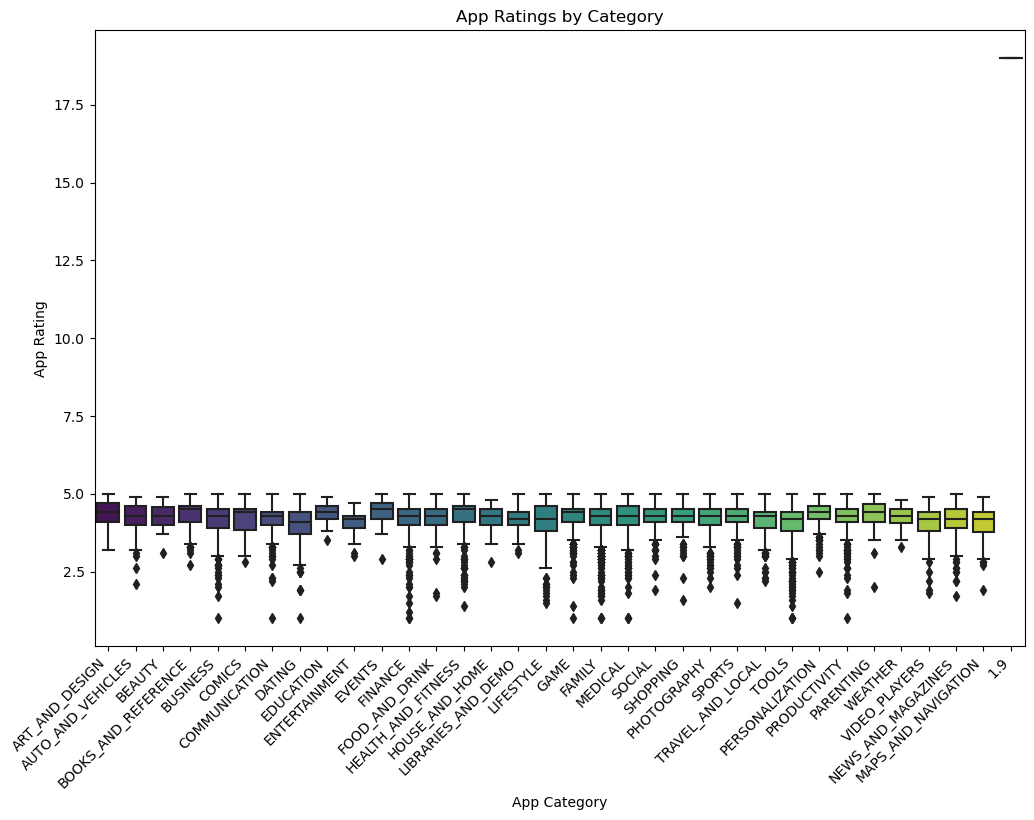

In [8]:
# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Rating', data=df, palette='viridis')
plt.title('App Ratings by Category')
plt.xlabel('App Category')
plt.ylabel('App Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [10]:
missing_values = df.isnull().sum()
missing_values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

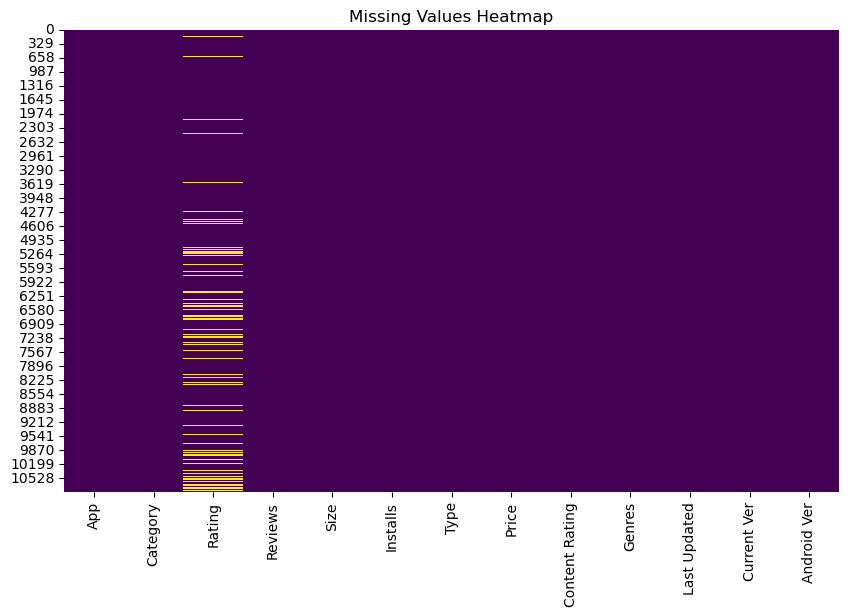

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

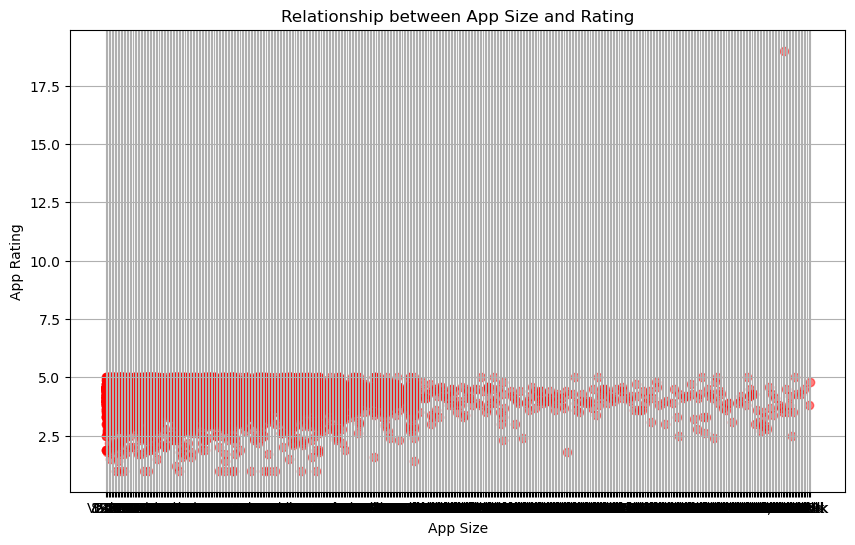

In [13]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Size'], df['Rating'], alpha=0.5, color='red')
plt.title('Relationship between App Size and Rating')
plt.xlabel('App Size')
plt.ylabel('App Rating')
plt.grid(True)
plt.show()

In [ ]:
# Create a bar chart
plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')
plt.title('Average Prices by App Type')
plt.xlabel('App Type')
plt.ylabel('Average Price')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
import pandas as pd

df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# Create a frequency table for the top 10 apps
top_apps_frequency = df.groupby('App')['Installs'].sum().sort_values(ascending=False).head(10)

# Display the frequency table
print("Top 10 Most Popular Apps:")
print(top_apps_frequency)


To identify the most popular app categories on the Google Play Store and make recommendations for a new app launch, you can follow these steps:

### 1. **Data Exploration:**
   - **Features to Analyze:**
     - `Category`: The category of the app.
     - `Installs`: The number of installs.
     - `Rating`: The user ratings.
     - `Reviews`: The number of user reviews.
   - **Approach:**
     - Explore the dataset to understand the distribution of app categories, the range of installs, ratings, and reviews.
     - Identify trends and patterns within categories.

### 2. **Popular Categories Analysis:**
   - **Features to Analyze:**
     - `Category`
     - `Installs`
   - **Approach:**
     - Calculate the average number of installs for each category.
     - Identify categories with the highest average installs.

### 3. **User Ratings Analysis:**
   - **Features to Analyze:**
     - `Category`
     - `Rating`
   - **Approach:**
     - Calculate the average user ratings for each category.
     - Identify categories with higher average ratings.

### 4. **User Reviews Analysis:**
   - **Features to Analyze:**
     - `Category`
     - `Reviews`
   - **Approach:**
     - Calculate the average number of reviews for each category.
     - Identify categories with higher engagement based on reviews.

### 5. **Correlation Analysis:**
   - **Features to Analyze:**
     - `Installs`
     - `Rating`
     - `Reviews`
   - **Approach:**
     - Check for correlations between installs, ratings, and reviews.
     - Identify if higher installs correlate with higher ratings or reviews.

### 6. **Visualization:**
   - **Features to Visualize:**
     - `Category`
     - `Installs`
     - `Rating`
     - `Reviews`
   - **Approach:**
     - Create visualizations such as bar charts, scatter plots, or heatmaps to represent the relationships and distributions within each category.

### 7. **Recommendations:**
   - **Based on Analysis:**
     - Provide insights on categories that are both popular and highly rated.
     - Identify potential niches or gaps in the market where the competition is low.
     - Consider user engagement and the number of reviews as indicators of active user communities.
     - Take note of any seasonality or trends that might affect app popularity.

### 8. **Competitor Analysis:**
   - **Features to Analyze:**
     - `Category`
     - `Installs`
     - `Rating`
     - `Reviews`
   - **Approach:**
     - Analyze the top apps in selected categories to understand their features, user reviews, and strategies.

### 9. **User Preferences and Demographics:**
   - **Features to Analyze:**
     - `Category`
     - `Genres`
     - `Installs`
   - **Approach:**
     - Analyze user preferences and demographics within specific categories or genres.

### 10. **App Monetization:**
   - **Features to Analyze:**
     - `Category`
     - `Type` (Free or Paid)
     - `Price`
   - **Approach:**
     - Analyze how monetization strategies vary across different categories.

### 11. **Market Trends and Insights:**
   - **Features to Analyze:**
     - `Last Updated`
     - `Current Version`
   - **Approach:**
     - Explore the dataset to identify recent trends and insights related to app updates and versions.

### 12. **Machine Learning Models (Optional):**
   - **Features to Consider:**
     - Multiple features from the dataset.
   - **Approach:**
     - Train machine learning models to predict app popularity or success based on historical data.

### Recommendations:
- Consider categories with a balance of high installs, positive ratings, and active user engagement.
- Focus on user preferences and demographics within these categories.
- Analyze competitors and look for opportunities to differentiate the new app.
- Stay informed about current market trends and adapt strategies accordingly.

By following these steps and analyzing relevant features, you can provide valuable insights and recommendations to guide the company's decision on launching a new app on the Google Play Store.

To identify the most successful app developers in the Google Play Store dataset, you can analyze several features that indicate an app's success. Here are key features to consider and suggested data visualizations to present your findings:

### 1. **Number of Installs:**
   - **Feature to Analyze:**
     - `Installs`
   - **Visualization:**
     - Bar chart or pie chart to show the distribution of total installs for each developer.
  
### 2. **Average User Rating:**
   - **Feature to Analyze:**
     - `Rating`
   - **Visualization:**
     - Boxplot or violin plot to compare the distribution of user ratings for each developer.
  
### 3. **Number of Reviews:**
   - **Feature to Analyze:**
     - `Reviews`
   - **Visualization:**
     - Bar chart or scatter plot to display the total number of reviews for each developer.
  
### 4. **App Count:**
   - **Feature to Analyze:**
     - Number of apps developed by each developer.
   - **Visualization:**
     - Bar chart or pie chart to illustrate the number of apps each developer has in the dataset.
  
### 5. **App Size and Success:**
   - **Feature to Analyze:**
     - `Size` of the apps.
   - **Visualization:**
     - Scatter plot to visualize the relationship between app size and success metrics (installs, ratings, reviews).
  
### 6. **Monetization Strategy:**
   - **Features to Analyze:**
     - `Type` (Free or Paid), `Price`
   - **Visualization:**
     - Pie chart or bar chart to display the distribution of free and paid apps for each developer.
  
### 7. **Content Rating Analysis:**
   - **Features to Analyze:**
     - `Content Rating`
   - **Visualization:**
     - Stacked bar chart to show the distribution of content ratings for each developer.

### 8. **Time Trends:**
   - **Features to Analyze:**
     - `Last Updated`, `Current Version`
   - **Visualization:**
     - Time series line chart to visualize the trend in app updates over time for each developer.

### 9. **User Engagement Over Time:**
   - **Features to Analyze:**
     - `Last Updated`, `Installs`, `Reviews`
   - **Visualization:**
     - Time series line charts showing how user engagement metrics (installs, reviews) change over time.

### 10. **Correlation Analysis:**
   - **Features to Analyze:**
     - `Installs`, `Rating`, `Reviews`
   - **Visualization:**
     - Heatmap or scatter plot matrix to visualize correlations between key success metrics.

### 11. **Top Developer Badge:**
   - **Feature to Analyze:**
     - Whether the developer has a "Top Developer" badge.
   - **Visualization:**
     - Pie chart or bar chart showing the distribution of top developers.

### 12. **Machine Learning Models (Optional):**
   - **Features to Consider:**
     - Multiple features from the dataset.
   - **Visualization:**
     - Confusion matrix or ROC curves if using classification models to identify successful developers.

### Recommendations:
- Identify developers with a high number of installs, positive ratings, and significant user engagement.
- Consider the diversity of the developer's portfolio in terms of app types and genres.
- Analyze user reviews and feedback to understand user satisfaction.
- Evaluate the impact of monetization strategies on success.
- Consider both quantity and quality of apps in the analysis.
- Monitor trends over time to assess the developer's commitment to app maintenance and updates.

By combining these features and visualizations, you can provide the mobile app development company with comprehensive insights into the success of different app developers in the Google Play Store. These insights will help the company make informed decisions about potential collaborations or investments in app development projects.

To identify the best time to launch a new app in the Google Play Store, a marketing research firm can analyze various features to understand patterns and trends over time. Here are key features to consider and suggested data visualizations to present findings:

### 1. **Monthly Installs:**
   - **Feature to Analyze:**
     - `Installs`, `Last Updated`
   - **Visualization:**
     - Line chart or bar chart showing monthly trends in app installs to identify peak months.

### 2. **Seasonal Trends:**
   - **Feature to Analyze:**
     - `Installs`, `Last Updated`
   - **Visualization:**
     - Boxplot or bar chart to show the distribution of installs across different seasons.

### 3. **App Updates Over Time:**
   - **Feature to Analyze:**
     - `Last Updated`
   - **Visualization:**
     - Time series line chart showing the frequency of app updates over months or years.

### 4. **User Reviews and Ratings Over Time:**
   - **Feature to Analyze:**
     - `Last Updated`, `Reviews`, `Rating`
   - **Visualization:**
     - Time series line charts to illustrate how user reviews and ratings change over time.

### 5. **Day-of-Week Trends:**
   - **Feature to Analyze:**
     - `Installs`, `Last Updated`
   - **Visualization:**
     - Bar chart or boxplot showing the distribution of installs on different days of the week.

### 6. **Time Since Last Update vs. Installs:**
   - **Feature to Analyze:**
     - `Last Updated`, `Installs`
   - **Visualization:**
     - Scatter plot or line chart to examine how the time since the last update correlates with installs.

### 7. **Content Updates Impact:**
   - **Feature to Analyze:**
     - `Content Rating`, `Last Updated`, `Installs`
   - **Visualization:**
     - Grouped bar chart or stacked bar chart showing the impact of content updates on installs.

### 8. **Market Trends and Competitor Analysis:**
   - **Feature to Analyze:**
     - `Last Updated`, `Installs`, `Category`
   - **Visualization:**
     - Compare trends in app launches and installs within the app's category, taking note of competitors.

### 9. **App Size and Launch Success:**
   - **Feature to Analyze:**
     - `Size`, `Installs`
   - **Visualization:**
     - Scatter plot or boxplot to evaluate the impact of app size on launch success.

### 10. **Monetization Strategy Over Time:**
   - **Feature to Analyze:**
     - `Last Updated`, `Type` (Free or Paid), `Price`
   - **Visualization:**
     - Stacked area chart or grouped bar chart showing the evolution of monetization strategy over time.

### 11. **Demographic Trends:**
   - **Feature to Analyze:**
     - `Installs`, `Last Updated`, `Content Rating`
   - **Visualization:**
     - Heatmap or bar chart to explore demographic trends over time.

### 12. **Machine Learning Models (Optional):**
   - **Features to Consider:**
     - Multiple features from the dataset.
   - **Visualization:**
     - ROC curves or lift charts if using classification models to predict successful launch times.

### Recommendations:
- Identify peak months or seasons with high user engagement based on app installs.
- Consider the impact of app updates on user reviews, ratings, and installs.
- Evaluate the distribution of installs across different days of the week.
- Monitor the time since the last update and its correlation with installs.
- Explore demographic trends and content rating impacts.
- Stay informed about market trends and competitor strategies.

By combining these features and visualizations, the marketing research firm can provide comprehensive insights into the optimal time to launch a new app, considering both temporal and strategic factors. The firm can offer data-driven recommendations to maximize the app's success in the competitive landscape of the Google Play Store.